# Light GBM

**<font color=red>리프 중심 트리 분할</font>**  
  
"**트리의 균형을 맞추지 않음** -> 트리의 깊이 깊어지고 비대칭적인 규칙 트리 생성 -> 예측 오류 손실을 최소화시킴"

> **장점**<br>
    - XGBoost보다 학습에 걸리는 시간이 훨씬 적고, 메모리 사용량도 상대적으로 적음<br>
    - 카테고리형 피처의 자동 변환과 최적 분할
<br>

> **단점**<br>
    - 적은 데이터 세트에 적용할 경우 과적합 문제가 발생하기 쉬움

## 설치하기

아니콘다 프롬포트를 관리자 권한으로 실행한 후 다음 명령어 수행  

```python
conda install -c conda-forge lightgbm
```

## 불러오기

In [2]:
import lightgbm

## 적용하기 - 위스콘신 유방암 예측

In [3]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터로 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = .2, random_state = 156)

# X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 156)

# XGBoost와 동일하게 n_estimators는 400으로 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate = .05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334

In [5]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [7]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


### 피처 중요도 시각화 - plot_importance()

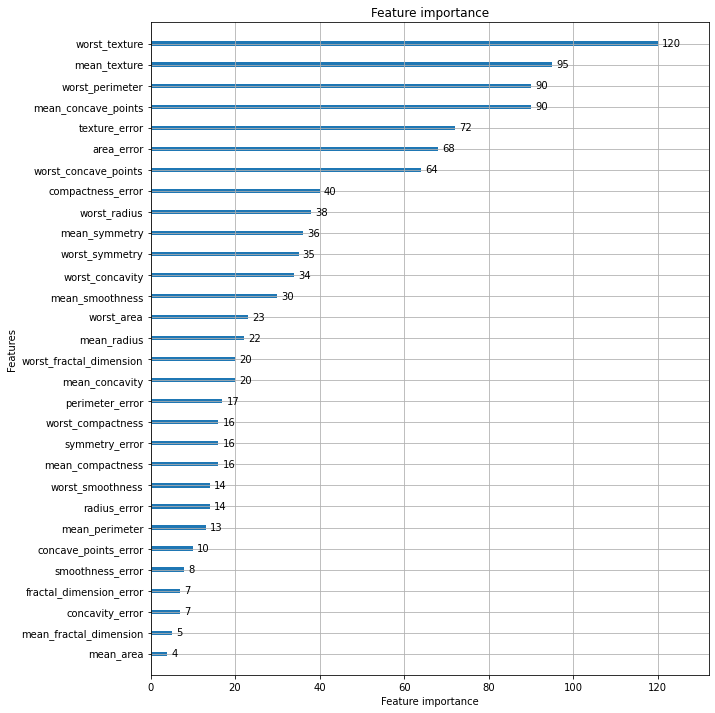

In [8]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax = ax)
plt.show()

--------

# 베이지안 최적화

: 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 <span style="color: #2D3748; background-color:#fff5b1;">**사후 모델을 개선**</span>해 나가면서 최적 함수 모델을 생성하는 것

## HyperOpt

HyperOpt를 사용하여 GridSearchCV를 사용하지 않고 최적의 파라미터 찾아보자.

In [9]:
!pip install hyperopt

In [10]:
from hyperopt import hp

|    기본 사용법                                         |
|------------------------------------------------------  |
|1. 입력 변수명과 입력값의 검색 공간(Search space) 설정   |
|2. 목적 함수(Objective Function) 설정                   |
|3. 목적 함수의 반환 최솟값을 가지는 최적 입력값 유추     |

-------------

### 검색 공간(범위) 설정

> 입력값의 검색 공간을 제공하는 대표적인 함수<br>
- hp.quniform(label, low, high, q) : 간격을 가지고 설정 **
- hp.uniform(label, low, high) : 정규 분포 형태의 검색 공간 설정
- hp.randint(label, upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정 **
- hp.chice(label, options) : 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 결우 설정
- hp.loguniform(label, low, high) : exp값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간을 설정

In [11]:
# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격의 입력 변수 y를 설정
search_space = {'x' : hp.quniform('x', -10, 10, 1), 'y' : hp.quniform('y', -15, 15, 1)}

-------

### 목적 함수 설정

- 함수를 설정한다기보다는 <span style="color:blue">**y 값을 주는 것**</span>임
- 반드시 변숫값과 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환하는 구조로 생성되어야 함

In [12]:
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20 * y # 목적 함수 반환값 설정
    return retval

입력값의 검색 공간과 목적 함수를 설정했으면 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값을 베이지안 최적화 기법에 기반하여 찾아줘야 함 => **<span style="color:blue">유추</span>**

--------

### 최적 입력값(x,y) 유추 - fmin()

In [13]:
from hyperopt import STATUS_OK, fmin, tpe, Trials
import numpy as np

In [14]:
trial_val = Trials() # 입력 결과값을 저장한 Trials 객체값 생성

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals = 5)로 찾아냄
best02 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5, trials = trial_val,\
              rstate = np.random.default_rng(seed = 0)) # seed 값이라 rstate 안 줘도 무방함

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 501.42trial/s, best loss: -224.0]


In [15]:
print(best02)

{'x': -4.0, 'y': 12.0}


입력 변수 x의 공간 설정과 목적 함수의 반환값을 설정을 통해 x는 0에 가까울수록, y는 15에 가까울수록 반환값이 최소로 근사될 수 있음을 알 수 있음<br>
5번의 수행으로 최적 값을 대략적으로 알 수 있었음<br> 5번 이상의 수행을 시도하면 어떻게 될까?

>  max_eval 값을 100으로 설정하여 재테스트

In [16]:
best03 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trial_val,\
              rstate = np.random.default_rng(seed = 0))

100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 114.33trial/s, best loss: -299.0]


In [17]:
print(best03)

{'x': -1.0, 'y': 15.0}


-----------

In [18]:
best03.items()

dict_items([('x', -1.0), ('y', 15.0)])

> df.results : 결과값을 보여주며, loss와 status를 키값으로 가짐

In [19]:
trial_val.results

[{'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -40.0, 'status': 'ok'},
 {'loss': 281.0, 'status': 'ok'},
 {'loss': 64.0, 'status': 'ok'},
 {'loss': 100.0, 'status': 'ok'},
 {'loss': 60.0, 'status': 'ok'},
 {'loss': -39.0, 'status': 'ok'},
 {'loss': 1.0, 'status': 'ok'},
 {'loss': -164.0, 'status': 'ok'},
 {'loss': 21.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -276.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': 204.0, 'status': 'ok'},
 {'loss': 304.0, 'status': 'ok'},
 {'loss': -136.0, 'status': 'ok'},
 {'loss': -244.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': -96.0, 'status': 'ok'},
 {'loss': -

> df.vals : 입력된 변수 값들을 보여줌

In [20]:
trial_val.vals

{'x': [-6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  -6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  2.0,
  10.0,
  -9.0,
  -8.0,
  -0.0,
  -0.0,
  1.0,
  9.0,
  6.0,
  9.0,
  -2.0,
  2.0,
  -2.0,
  -2.0,
  -2.0,
  -2.0,
  -6.0,
  4.0,
  -8.0,
  -1.0,
  6.0,
  2.0,
  5.0,
  2.0,
  -5.0,
  -3.0,
  -7.0,
  7.0,
  -1.0,
  -5.0,
  3.0,
  -10.0,
  -1.0,
  -3.0,
  1.0,
  -5.0,
  -3.0,
  1.0,
  -1.0,
  -4.0,
  -7.0,
  3.0,
  8.0,
  -0.0,
  3.0,
  -6.0,
  -10.0,
  -4.0,
  0.0,
  5.0,
  -8.0,
  -1.0,
  1.0,
  4.0,
  -9.0,
  2.0,
  -2.0,
  -3.0,
  -2.0,
  -5.0,
  -1.0,
  -1.0,
  1.0,
  -0.0,
  -3.0,
  -7.0,
  -4.0,
  5.0,
  3.0,
  -4.0,
  -2.0,
  -6.0,
  -1.0,
  2.0,
  -5.0,
  4.0,
  -3.0,
  0.0,
  -2.0,
  6.0,
  -9.0,
  1.0,
  -1.0,
  -2.0,
  7.0,
  3.0,
  -3.0,
  -6.0,
  1.0,
  -0.0],
 'y': [5.0,
  10.0,
  -2.0,
  12.0,
  1.0,
  5.0,
  10.0,
  -2.0,
  12.0,
  1.0,
  15.0,
  7.0,
  -10.0,
  0.0,
  -5.0,
  -3.0,
  2.0,
  4.0,
  10.0,
  3.0,
  15.0,
  14.0,
  15.0,
  -10.0,
  -15.0,
  7.0,
  14.0,
  12.0,
  8.0,
 

-------------

# XGBoost + HyperOpt

In [21]:
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = features = dataset.data
y = labels = dataset.target

# 전체 데이터 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state = 156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 156)

In [22]:
# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 

In [23]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

In [24]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn = objective_func, 
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trial_val,
            rstate = np.random.default_rng(seed = 9))

print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:10<00:00,  4.81trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


> 최적의 파라미터 값 입력

In [25]:
xgb_clf_best = XGBClassifier(n_estimators=100, max_depth=17,
                             min_child_weight=2, # int형이니까 2.0 아니고 2라고 입력해야 함
                             learning_rate=0.12601372924444681,
                             colsample_bytree=0.5424149213362504)

In [26]:
xgb_clf_best.fit(X_train, y_train)
pred = xgb_clf_best.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

-----------

# 분류 실습 - 산탄데르 고객 만족 예측

In [27]:
# #캐글
# import os
# os.getcwd() # 워킹 디렉토리 확인
# os.chdir('C:/Users/admin/data') # 워킹 디렉토리 변경
# os.getcwd() # 재확인

In [28]:
cust_df = pd.read_csv('santander.csv')
cust_df[:3]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [29]:
cust_df.info() # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [30]:
cust_df.isna().sum() # 결측치 존재 확인

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [31]:
cust_df.columns # 컬럼 목록 확인

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [32]:
cust_df.TARGET

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

> 전체 데이터에서 만족과 불만족의 비율 살펴보기

In [33]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print(f'unsatisfied 비율은 {(unsatisfied_cnt/total_cnt):.2f}')

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [34]:
cust_df.describe() # 각 피처의 값 분포 확인

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [35]:
cust_df['TARGET'].value_counts()/len(cust_df) # 데이터 균형 확인

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

> var3 컬럼의 경우 min 값이 -9999999이다. 이 값을 2로 바꾸어주자.

In [36]:
cust_df['var3'].replace(-999999, 2, inplace = True)

> ID 피처는 단순 식별자에 불과하므로 드롭해주자.

In [37]:
cust_df.drop('ID', axis = 1, inplace = True)

> 피처 세트와 레이블 세트 분리해주자.  
(레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리)

In [38]:
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print(f'피처 데이터 shape: {X_features.shape}')

피처 데이터 shape: (76020, 369)


> 학습과 성능평가를 위해 원본 데이터 세트에서 학습 및 테스트용 데이터 세트를 분리해주자.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = .2, random_state = 0)

> 비대칭한 데이터 세트이므로 학습데이터와 데이터 세트가 비슷하게 추출됐는지 확인해보자.

In [40]:
y_train.value_counts() / len(y_train)

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

In [41]:
y_test.value_counts() / len(y_test)

0    0.9583
1    0.0417
Name: TARGET, dtype: float64

> X_train과 y_train을 다시 학습과 검증 데이터 세트로 분리
>>XGBoost의 조기 중단의 검증 데이터 세트로 사용하기 위함

In [42]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .3, random_state = 0)

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [44]:
xgb_clf = XGBClassifier(n_estimators = 100, learning_rate = 0.5, random_state = 156)

> 성능 지표 평가는 'auc'로, 조기 중단 파라미터는 100으로 설정하고 학습을 수행시켜 보자.

In [45]:
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83563	validation_1-auc:0.81135
[2]	validation_0-auc:0.84371	validation_1-auc:0.81588
[3]	validation_0-auc:0.85454	validation_1-auc:0.82045
[4]	validation_0-auc:0.86248	validation_1-auc:0.82554
[5]	validation_0-auc:0.86840	validation_1-auc:0.82908
[6]	validation_0-auc:0.87515	validation_1-auc:0.82904
[7]	validation_0-auc:0.87988	validation_1-auc:0.82872
[8]	validation_0-auc:0.88456	validation_1-auc:0.82825
[9]	validation_0-auc:0.88775	validation_1-auc:0.82854
[10]	validation_0-auc:0.89313	validation_1-auc:0.82790
[11]	validation_0-auc:0.89576	validation_1-auc:0.82928
[12]	validation_0-auc:0.89830	validation_1-auc:0.82963
[13]	validation_0-auc:0.89944	validation_1-auc:0.82916
[14]	validation_0-auc:0.90127	validation_1-auc:0.82808
[15]	validation_0-auc:0.90449	validation_1-auc:0.82584
[16]	validation_0-auc:0.90757	validation_1-auc:0.82378
[17]	validation_0-auc:0.91009	validation_1-auc:0.82337
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

> 예측 및 정확도 평가

In [46]:
pred = xgb_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9579715864246251

> XGBoost를 이용한 데이터 세트를 학습시킨 후, 테스트 데이터 세트로 평가된 ROC-AUC 값을 확인해보자.

In [47]:
from sklearn.metrics import roc_auc_score

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC : {xgb_roc_score:.4f}')

ROC AUC : 0.8385


> HyperOpt를 이용한 베이지안 최적화 기반으로 XGBoost의 하이퍼 파라미터 튜닝을 수행해보자.

In [48]:
from hyperopt import hp

# 검색 공간 설정
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) 
                    }

In [49]:
# 목적 함수 설정
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list 생성
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 추가
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

> fmin() 함수를 호출해 최적의 하이퍼 파라미터를 도출해보자.

In [50]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 5, # 최대 반복 횟수 지정
            trials = trials,
            rstate = np.random.default_rng(seed = 30))

print('best: ', best)

  0%|                                                                            | 0/5 [00:00<?, ?trial/s, best loss=?]

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81645	validation_1-auc:0.80415                                                                  
[1]	validation_0-auc:0.82149	validation_1-auc:0.80712                                                                  
[2]	validation_0-auc:0.83100	validation_1-auc:0.82058                                                                  
[3]	validation_0-auc:0.83162	validation_1-auc:0.81977                                                                  
[4]	validation_0-auc:0.83682	validation_1-auc:0.81846                                                                  
[5]	validation_0-auc:0.83858	validation_1-auc:0.82111                                                                  
[6]	validation_0-auc:0.84021	validation_1-auc:0.82048                                                                  
[7]	validation_0-auc:0.84093	validation_1-auc:0.82130                                                                  
[8]	validation_0-auc:0.84181	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82722	validation_1-auc:0.81055                                                                  
[1]	validation_0-auc:0.83004	validation_1-auc:0.81294                                                                  
[2]	validation_0-auc:0.83657	validation_1-auc:0.81821                                                                  
[3]	validation_0-auc:0.83902	validation_1-auc:0.81736                                                                  
[4]	validation_0-auc:0.84061	validation_1-auc:0.81876                                                                  
[5]	validation_0-auc:0.84373	validation_1-auc:0.82262                                                                  
[6]	validation_0-auc:0.84346	validation_1-auc:0.82117                                                                  
[7]	validation_0-auc:0.84401	validation_1-auc:0.82159                                                                  
[8]	validation_0-auc:0.84546	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82774	validation_1-auc:0.80070                                                                  
[1]	validation_0-auc:0.83281	validation_1-auc:0.80392                                                                  
[2]	validation_0-auc:0.83808	validation_1-auc:0.80674                                                                  
[3]	validation_0-auc:0.84214	validation_1-auc:0.80910                                                                  
[4]	validation_0-auc:0.84461	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84588	validation_1-auc:0.81084                                                                  
[6]	validation_0-auc:0.84961	validation_1-auc:0.81557                                                                  
[7]	validation_0-auc:0.85247	validation_1-auc:0.81735                                                                  
[8]	validation_0-auc:0.85333	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82128	validation_1-auc:0.80603                                                                  
[1]	validation_0-auc:0.82734	validation_1-auc:0.80820                                                                  
[2]	validation_0-auc:0.83693	validation_1-auc:0.81837                                                                  
[3]	validation_0-auc:0.84076	validation_1-auc:0.82377                                                                  
[4]	validation_0-auc:0.84675	validation_1-auc:0.82426                                                                  
[5]	validation_0-auc:0.84979	validation_1-auc:0.82363                                                                  
[6]	validation_0-auc:0.85384	validation_1-auc:0.82628                                                                  
[7]	validation_0-auc:0.85475	validation_1-auc:0.82713                                                                  
[8]	validation_0-auc:0.85587	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83112	validation_1-auc:0.81268                                                                  
[1]	validation_0-auc:0.83682	validation_1-auc:0.81355                                                                  
[2]	validation_0-auc:0.84258	validation_1-auc:0.81920                                                                  
[3]	validation_0-auc:0.84275	validation_1-auc:0.81851                                                                  
[4]	validation_0-auc:0.84851	validation_1-auc:0.81928                                                                  
[5]	validation_0-auc:0.85510	validation_1-auc:0.82100                                                                  
[6]	validation_0-auc:0.85611	validation_1-auc:0.82251                                                                  
[7]	validation_0-auc:0.85814	validation_1-auc:0.82231                                                                  
[8]	validation_0-auc:0.85953	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82657	validation_1-auc:0.80149                                                                  
[1]	validation_0-auc:0.83724	validation_1-auc:0.80530                                                                  
[2]	validation_0-auc:0.84620	validation_1-auc:0.81009                                                                  
[3]	validation_0-auc:0.84867	validation_1-auc:0.81020                                                                  
[4]	validation_0-auc:0.85292	validation_1-auc:0.81531                                                                  
[5]	validation_0-auc:0.85540	validation_1-auc:0.81681                                                                  
[6]	validation_0-auc:0.85916	validation_1-auc:0.81716                                                                  
[7]	validation_0-auc:0.86259	validation_1-auc:0.81789                                                                  
[8]	validation_0-auc:0.86617	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82424	validation_1-auc:0.80450                                                                  
[1]	validation_0-auc:0.83668	validation_1-auc:0.81505                                                                  
[2]	validation_0-auc:0.84661	validation_1-auc:0.82324                                                                  
[3]	validation_0-auc:0.84859	validation_1-auc:0.82247                                                                  
[4]	validation_0-auc:0.85266	validation_1-auc:0.82327                                                                  
[5]	validation_0-auc:0.85659	validation_1-auc:0.82284                                                                  
[6]	validation_0-auc:0.86155	validation_1-auc:0.82378                                                                  
[7]	validation_0-auc:0.86509	validation_1-auc:0.82397                                                                  
[8]	validation_0-auc:0.87084	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83493	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.84197	validation_1-auc:0.81316                                                                  
[2]	validation_0-auc:0.85026	validation_1-auc:0.81739                                                                  
[3]	validation_0-auc:0.85484	validation_1-auc:0.81605                                                                  
[4]	validation_0-auc:0.85947	validation_1-auc:0.81763                                                                  
[5]	validation_0-auc:0.86117	validation_1-auc:0.81876                                                                  
[6]	validation_0-auc:0.86492	validation_1-auc:0.82089                                                                  
[7]	validation_0-auc:0.86831	validation_1-auc:0.82248                                                                  
[8]	validation_0-auc:0.87071	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82822	validation_1-auc:0.80085                                                                  
[1]	validation_0-auc:0.83452	validation_1-auc:0.80298                                                                  
[2]	validation_0-auc:0.83879	validation_1-auc:0.80562                                                                  
[3]	validation_0-auc:0.84177	validation_1-auc:0.80715                                                                  
[4]	validation_0-auc:0.84381	validation_1-auc:0.80986                                                                  
[5]	validation_0-auc:0.84400	validation_1-auc:0.80852                                                                  
[6]	validation_0-auc:0.84627	validation_1-auc:0.81028                                                                  
[7]	validation_0-auc:0.85133	validation_1-auc:0.81525                                                                  
[8]	validation_0-auc:0.85175	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82234	validation_1-auc:0.80555                                                                  
[1]	validation_0-auc:0.82821	validation_1-auc:0.80812                                                                  
[2]	validation_0-auc:0.83272	validation_1-auc:0.81079                                                                  
[3]	validation_0-auc:0.83784	validation_1-auc:0.82045                                                                  
[4]	validation_0-auc:0.84577	validation_1-auc:0.82188                                                                  
[5]	validation_0-auc:0.84814	validation_1-auc:0.82236                                                                  
[6]	validation_0-auc:0.85202	validation_1-auc:0.82448                                                                  
[7]	validation_0-auc:0.85363	validation_1-auc:0.82626                                                                  
[8]	validation_0-auc:0.85501	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83132	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.83662	validation_1-auc:0.81285                                                                  
[2]	validation_0-auc:0.84048	validation_1-auc:0.81616                                                                  
[3]	validation_0-auc:0.84220	validation_1-auc:0.81680                                                                  
[4]	validation_0-auc:0.84545	validation_1-auc:0.81751                                                                  
[5]	validation_0-auc:0.85363	validation_1-auc:0.82067                                                                  
[6]	validation_0-auc:0.85464	validation_1-auc:0.82229                                                                  
[7]	validation_0-auc:0.85629	validation_1-auc:0.82187                                                                  
[8]	validation_0-auc:0.85654	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82730	validation_1-auc:0.80139                                                                  
[1]	validation_0-auc:0.84185	validation_1-auc:0.80782                                                                  
[2]	validation_0-auc:0.84905	validation_1-auc:0.81110                                                                  
[3]	validation_0-auc:0.85357	validation_1-auc:0.81297                                                                  
[4]	validation_0-auc:0.85984	validation_1-auc:0.81412                                                                  
[5]	validation_0-auc:0.86445	validation_1-auc:0.81503                                                                  
[6]	validation_0-auc:0.86836	validation_1-auc:0.81527                                                                  
[7]	validation_0-auc:0.87144	validation_1-auc:0.81559                                                                  
[8]	validation_0-auc:0.87841	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82403	validation_1-auc:0.80542                                                                  
[1]	validation_0-auc:0.83752	validation_1-auc:0.81644                                                                  
[2]	validation_0-auc:0.84646	validation_1-auc:0.82204                                                                  
[3]	validation_0-auc:0.85356	validation_1-auc:0.82355                                                                  
[4]	validation_0-auc:0.85684	validation_1-auc:0.82385                                                                  
[5]	validation_0-auc:0.86408	validation_1-auc:0.82520                                                                  
[6]	validation_0-auc:0.86996	validation_1-auc:0.82501                                                                  
[7]	validation_0-auc:0.87481	validation_1-auc:0.82853                                                                  
[8]	validation_0-auc:0.87960	validation_

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83591	validation_1-auc:0.80958                                                                  
[1]	validation_0-auc:0.84347	validation_1-auc:0.81172                                                                  
[2]	validation_0-auc:0.85065	validation_1-auc:0.81595                                                                  
[3]	validation_0-auc:0.85812	validation_1-auc:0.81956                                                                  
[4]	validation_0-auc:0.86408	validation_1-auc:0.82143                                                                  
[5]	validation_0-auc:0.86731	validation_1-auc:0.82281                                                                  
[6]	validation_0-auc:0.87105	validation_1-auc:0.82461                                                                  
[7]	validation_0-auc:0.87499	validation_1-auc:0.82682                                                                  
[8]	validation_0-auc:0.88082	validation_

In [51]:
xgb_clf_best = XGBClassifier(n_estimators = 100, max_depth = 6,
                             min_child_weight = 2,
                             colsample_bytree=0.753532317468581,
                             learning_rate=0.08326583869166816)

In [52]:
xgb_clf_best.fit(X_tr, y_tr, early_stopping_rounds = 100,
                 eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_val, xgb_clf_best.predict_proba(X_val)[:, 1])
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82148	validation_1-auc:0.80768
[1]	validation_0-auc:0.83037	validation_1-auc:0.80964
[2]	validation_0-auc:0.83376	validation_1-auc:0.81063
[3]	validation_0-auc:0.83600	validation_1-auc:0.81105
[4]	validation_0-auc:0.83530	validation_1-auc:0.81046
[5]	validation_0-auc:0.83812	validation_1-auc:0.81185
[6]	validation_0-auc:0.83869	validation_1-auc:0.81144
[7]	validation_0-auc:0.84231	validation_1-auc:0.81423
[8]	validation_0-auc:0.84334	validation_1-auc:0.81393
[9]	validation_0-auc:0.84849	validation_1-auc:0.81820
[10]	validation_0-auc:0.84772	validation_1-auc:0.81669
[11]	validation_0-auc:0.84749	validation_1-auc:0.81579
[12]	validation_0-auc:0.84960	validation_1-auc:0.81675
[13]	validation_0-auc:0.85230	validation_1-auc:0.81834
[14]	validation_0-auc:0.85498	validation_1-auc:0.82075
[15]	validation_0-auc:0.85582	validation_1-auc:0.82076
[16]	validation_0-auc:0.85704	validation_1-auc:0.82095
[17]	validation_0-auc:0.85912	validation_1-auc:0.82172
[18]	validation_0-au

=> 음... 떨어졌는데? 시간이 오래 걸린다고 해서 max_eval을 50 대신 5로 잡아서 그런가?

> 튜닝된 모델에서 각 피처의 중요도를 그래프로 나타내보자.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

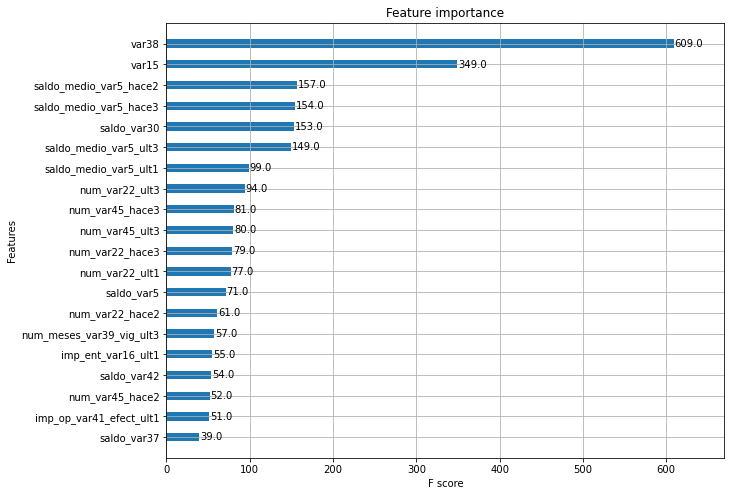

In [53]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize = (10,8))
plot_importance(xgb_clf_best, ax = ax, max_num_features = 20, height = .4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [54]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 100)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) 

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc

=> LightGBM을 직접 수행해보니 XGBoost 보다 학습에 걸리는 시간이 좀 더 단축됐음

> HyperOpt을 이용하여 다양한 하이퍼 파라미터에 대한 튜닝을 수행해보자.

In [55]:
# 검색 공간 설정
lgbm_search_space = {'num_leaves' : hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth' : hp.quniform('max_dapth', 100, 160, 1),
                     'min_child_samples' : hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample' : hp.uniform('subsample', 0.7, 1),
                     'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [56]:
# 목적 함수 생성
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators = 10,
                              num_leaves = int(search_space['num_leaves']),
                              max_depth = int(search_space['max_depth']),
                              min_child_samples = int(search_space['min_child_samples']),
                              subsample=search_space['subsample'],
                              learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list 생성
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 3회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=3, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 추가
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [ ]:
# fmin() 함수를 호출하여 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn = objective_func,
            space = lgbm_search_space,
            algo = tpe.suggest,
            trials = trials,
            rstate = np.random.default_rng(seed = 30))

print('best: ', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
Training until validation scores don't improve for 3 rounds                                                            
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's a

In [ ]:
# fmin() 함수를 호출하여 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn = objective_func,
            space = lgbm_search_space,
            algo = tpe.suggest,
            trials = trials,
            rstate = np.random.default_rng(seed = 30))

print('best: ', best)

lgbm_clf_best = LGBMClassifier(n_estimators = 100,
                               num_leaves = 41,
                               max_depth = 121,
                               min_child_samples = 69,
                               subsample=0.91489,
                               learning_rate=0.08592)

lgbm_clf_best.fit(X_tr, y_tr, early_stopping_rounds = 100.
                  eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_best.predict_proba(X_test)[:,1])

print('ROC AUC: {0:.4f}'.fomat(lgbm_roc_score))

시간이 너무 오래 걸려서 그만함

-----------